# About Dataset

- **Student ID** : A unique identifier assigned to each student (1001 to 3392).<br><br>
- **Age**: The age of the students ranges from 15 to 18 years.<br><br>
- **Gender**: Gender of the students, where 0 represents Male and 1 represents Female.<br><br>
- **Ethnicity**: The ethnicity of the students, coded as follows:<br>
0: Caucasian <br>
1: African American <br>
2: Asian <br>
3: Other <br><br>

- **ParentalEducation**: The education level of the parents, coded as follows:<br>
0: None<br>
1: High School<br>
2: Some College<br>
3: Bachelor's<br>
4: Higher<br><br>

**Study Habits**<br>
- `StudyTimeWeekly`: Weekly study time in hours, ranging from 0 to 20.
- `Absences`: Number of absences during the school year, ranging from 0 to 30.
- `Tutoring`: Tutoring status, where 0 indicates No and 1 indicates Yes.<br><br>

**Parental Involvement**<br>
- **`ParentalSupport:`** The level of parental support, coded as follows:<br>
0: None<br>
1: Low<br>
2: Moderate<br>
3: High<br>
4: Very High<br><br>

**Extracurricular Activities**
- **`Extracurricular`**: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
- **`Sports`**: Participation in sports, where 0 indicates No and 1 indicates Yes.
- **`Music`**: Participation in music activities, where 0 indicates No and 1 indicates Yes.
- **`Volunteering`**: Participation in volunteering, where 0 indicates No and 1 indicates Yes.<br><br>

**Academic Performance**
- **`GPA`**: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.<br><br>

**Target Variable**: `Grade Class`<br>
- **GradeClass**: Classification of students' grades based on GPA:<br>
0: 'A' (GPA >= 3.5)<br>
1: 'B' (3.0 <= GPA < 3.5)<br>
2: 'C' (2.5 <= GPA < 3.0)<br>
3: 'D' (2.0 <= GPA < 2.5)<br>
4: 'F' (GPA < 2.0)<br><br>

# Importing the neccessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


# Loading the dataset

In [3]:
data = pd.read_csv('Student_performance_data.csv')
data.shape

(2392, 15)

In [4]:
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [6]:
data.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [7]:
data.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [8]:
data['Age'].describe()

count    2392.000000
mean       16.468645
std         1.123798
min        15.000000
25%        15.000000
50%        16.000000
75%        17.000000
max        18.000000
Name: Age, dtype: float64

In [9]:
data['GPA'].describe()

count    2392.000000
mean        1.906186
std         0.915156
min         0.000000
25%         1.174803
50%         1.893393
75%         2.622216
max         4.000000
Name: GPA, dtype: float64

# Removing the unnecessary attributes from the data

In [10]:
data.drop(['StudentID', 'Ethnicity'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   ParentalEducation  2392 non-null   int64  
 3   StudyTimeWeekly    2392 non-null   float64
 4   Absences           2392 non-null   int64  
 5   Tutoring           2392 non-null   int64  
 6   ParentalSupport    2392 non-null   int64  
 7   Extracurricular    2392 non-null   int64  
 8   Sports             2392 non-null   int64  
 9   Music              2392 non-null   int64  
 10  Volunteering       2392 non-null   int64  
 11  GPA                2392 non-null   float64
 12  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 243.1 KB


# Splitting the dependent and independent variables

In [11]:
x = data.drop('GPA', axis=1)
y = data['GPA']

# Splitting the train and test data

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)
x_train.shape,x_test.shape

((1913, 12), (479, 12))

# Creating and training the data into Linear Regression

In [13]:
model = LinearRegression()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Model Evaluation 

In [14]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 0.038161313968632024
R-squared: 0.955196826177345


# Analysing Actual vs Predicted values using scatter plot

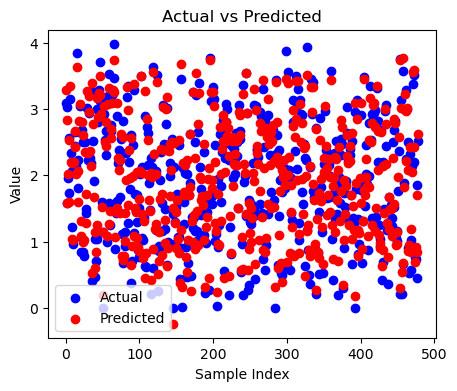

In [19]:
plt.figure(figsize=(5, 4))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')

plt.title('Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Predicting our own data

In [16]:
'''[ Age, Gender, ParentalEducation, StudyTimeWeekly, 
        Absences, Tutoring, ParentalSupport,Extracurricular, 
            Sports, Music, Volunteering, GradeClass ]'''

new_student = np.array([[17, 1, 0, 1.0, 3, 1, 1, 0, 1, 1, 0, 2.5]])
predicted_gpa = model.predict(new_student)

print("Predicted GPA for the new student:", predicted_gpa[0])

Predicted GPA for the new student: 2.944595706504728


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
